This Jupyter Notebook consists of Round2 through Round7 Labs...

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

import time
from datetime import date

#!pip3 install seaborn if you need to

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# START OF ROUND2

## GET DATA

In [2]:
marketing_customer_analysis = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
marketing_customer_analysis.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
marketing_customer_analysis.shape

(10910, 26)

## Standardize header names.

In [5]:
marketing_customer_analysis_columns = marketing_customer_analysis.columns
marketing_customer_analysis_columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
#Standardize header names.
cols1=[]
for c in range(len(marketing_customer_analysis.columns)):
    cols1.append(marketing_customer_analysis.columns[c].lower().replace(' ','_'))
marketing_customer_analysis.columns = cols1

print(marketing_customer_analysis.columns)

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')


## Which columns are numerical?

In [7]:
marketing_customer_analysis._get_numeric_data()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [8]:
marketing_customer_analysis.select_dtypes(np.number)

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


## Which columns are categorical?

In [9]:
marketing_customer_analysis.select_dtypes(object) 

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [10]:
marketing_customer_analysis.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [11]:
round(marketing_customer_analysis.isna().sum()/len(marketing_customer_analysis),4)*100 #the percentage of NaN values in the columns.

unnamed:_0                        0.00
customer                          0.00
state                             5.78
customer_lifetime_value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective_to_date                 0.00
employmentstatus                  0.00
gender                            0.00
income                            0.00
location_code                     0.00
marital_status                    0.00
monthly_premium_auto              0.00
months_since_last_claim           5.80
months_since_policy_inception     0.00
number_of_open_complaints         5.80
number_of_policies                0.00
policy_type                       0.00
policy                            0.00
renew_offer_type                  0.00
sales_channel                     0.00
total_claim_amount                0.00
vehicle_class                     5.70
vehicle_size                      5.70
vehicle_type             

In [12]:
marketing_customer_analysis.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [13]:
#Vehicle type was dropped since it has 50.25% NaN values.
columns_raw=list(marketing_customer_analysis.columns)

marketing_customer_analysis.dropna(axis=1, thresh= 0.9*len(marketing_customer_analysis), inplace=True) 
#thresh = x * len(DataFrame) => x: ratio of clean data to all data in rows of the dataframe. 
#The remaining is NaN value. 

columns_result=list(marketing_customer_analysis.columns)

columns_dropped=list(set(columns_raw) - set(columns_result))

print(columns_dropped)

['vehicle_type']


In [14]:
marketing_customer_analysis['vehicle_class'].unique()

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', nan], dtype=object)

In [15]:
marketing_customer_analysis['vehicle_class'].value_counts()

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

In [16]:
marketing_customer_analysis['vehicle_class'].value_counts(dropna=False)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

In [17]:
marketing_customer_analysis['vehicle_class'] = marketing_customer_analysis['vehicle_class'].fillna('Four-Door Car') # the most frequent value

In [18]:
marketing_customer_analysis['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large', nan], dtype=object)

In [19]:
marketing_customer_analysis['vehicle_size'].value_counts()

Medsize    7251
Small      1966
Large      1071
Name: vehicle_size, dtype: int64

In [20]:
marketing_customer_analysis['vehicle_size'].value_counts(dropna=False)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: vehicle_size, dtype: int64

In [21]:
marketing_customer_analysis['vehicle_size'] = marketing_customer_analysis['vehicle_size'].fillna('Medsize') # the most frequent value

In [22]:
marketing_customer_analysis['number_of_open_complaints'].unique()

array([ 0., nan,  3.,  1.,  2.,  4.,  5.])

In [23]:
marketing_customer_analysis['number_of_open_complaints'].value_counts()

0.0    8160
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: number_of_open_complaints, dtype: int64

In [24]:
marketing_customer_analysis['number_of_open_complaints'].value_counts(dropna=False)

0.0    8160
1.0    1145
NaN     633
2.0     414
3.0     324
4.0     166
5.0      68
Name: number_of_open_complaints, dtype: int64

In [25]:
marketing_customer_analysis['number_of_open_complaints'] = marketing_customer_analysis['number_of_open_complaints'].fillna('0.0') # the most frequent value

In [26]:
marketing_customer_analysis['number_of_open_complaints'].value_counts(dropna=False)

0.0    8160
1.0    1145
0.0     633
2.0     414
3.0     324
4.0     166
5.0      68
Name: number_of_open_complaints, dtype: int64

In [27]:
marketing_customer_analysis['months_since_last_claim'].unique()

array([ 7.,  3., 34., 10., nan,  2.,  8., 35., 33., 19., 13.,  5., 24.,
       25.,  6., 20., 26., 14.,  9., 29., 11.,  1., 18., 16., 30., 12.,
        4., 22., 31., 21., 28., 17., 15., 32., 23., 27.,  0.])

In [28]:
marketing_customer_analysis['months_since_last_claim'].value_counts()

3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
23.0    276
19.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months_since_last_claim, dtype: int64

In [29]:
marketing_customer_analysis['months_since_last_claim'].value_counts(dropna=False)

NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
19.0    276
23.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months_since_last_claim, dtype: int64

In [30]:
marketing_customer_analysis['months_since_last_claim'] = marketing_customer_analysis['months_since_last_claim'].fillna('3.0') # the most frequent value

In [31]:
marketing_customer_analysis['response'].unique()

array(['No', 'Yes', nan], dtype=object)

In [32]:
marketing_customer_analysis['response'].value_counts()

No     8813
Yes    1466
Name: response, dtype: int64

In [33]:
marketing_customer_analysis['response'].value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: response, dtype: int64

In [34]:
marketing_customer_analysis['response'] = marketing_customer_analysis['response'].fillna('No') # the most frequent value

In [35]:
marketing_customer_analysis['state'].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

In [36]:
marketing_customer_analysis['state'].value_counts()

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [37]:
marketing_customer_analysis['state'].value_counts(dropna=False)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: state, dtype: int64

In [38]:
marketing_customer_analysis['state'] = marketing_customer_analysis['state'].fillna('California') # the most frequent value

In [39]:
marketing_customer_analysis = marketing_customer_analysis.drop(['unnamed:_0','customer'], axis=1) #we do not need these columns.

In [40]:
marketing_customer_analysis

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,3.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,3.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


## Datetime format - Extract the months from the dataset and store in a separate column.

In [41]:
marketing_customer_analysis['effective_to_date'] = pd.to_datetime(marketing_customer_analysis['effective_to_date'])

In [42]:
marketing_customer_analysis.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                  object
months_since_policy_inception             int64
number_of_open_complaints                object
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [43]:
marketing_customer_analysis['year'] = marketing_customer_analysis['effective_to_date'].dt.year

In [44]:
marketing_customer_analysis['month'] = marketing_customer_analysis['effective_to_date'].dt.month

In [45]:
marketing_customer_analysis

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011,2
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011,1
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,3.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,3.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,2011,1
10906,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2011,1
10907,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011,2
10908,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2011,2


In [46]:
marketing_customer_analysis[(marketing_customer_analysis['month'] < 4)]

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011,2
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011,1
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,3.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,3.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,2011,1
10906,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2011,1
10907,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011,2
10908,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2011,2


## BONUS: Put all the previously mentioned data transformations into a function.

In [47]:
marketing_customer_analysis = pd.read_csv('marketing_customer_analysis.csv')

In [48]:
def dealing_with_data(marketing_customer_analysis):
    marketing_customer_analysis.columns = [c.lower().replace(' ','_') for c in marketing_customer_analysis.columns]
    marketing_customer_analysis = marketing_customer_analysis.drop(['unnamed:_0','customer'], axis=1)
    marketing_customer_analysis['vehicle_class'] = marketing_customer_analysis['vehicle_class'].fillna('Four-Door Car') # the most frequent value
    marketing_customer_analysis['vehicle_size'] = marketing_customer_analysis['vehicle_size'].fillna('Medsize') # the most frequent value
    marketing_customer_analysis.dropna(axis=1, thresh= 0.9*len(marketing_customer_analysis), inplace=True) #Vehicle type is dropped
    marketing_customer_analysis['number_of_open_complaints'] = marketing_customer_analysis['number_of_open_complaints'].fillna('0.0') # the most frequent value
    marketing_customer_analysis['months_since_last_claim'] = marketing_customer_analysis['months_since_last_claim'].fillna('3.0') # the most frequent value
    marketing_customer_analysis['response'] = marketing_customer_analysis['response'].fillna('No') # the most frequent value
    marketing_customer_analysis['state'] = marketing_customer_analysis['state'].fillna('California') # the most frequent value
    marketing_customer_analysis['effective_to_date'] = pd.to_datetime(marketing_customer_analysis['effective_to_date'],errors='coerce')
    marketing_customer_analysis['year'] = marketing_customer_analysis['effective_to_date'].dt.year
    marketing_customer_analysis['month'] = marketing_customer_analysis['effective_to_date'].dt.month
    marketing_customer_analysis = marketing_customer_analysis[(marketing_customer_analysis['month'] < 4)]
    
    return marketing_customer_analysis

In [49]:
data_new = dealing_with_data(marketing_customer_analysis)

# END OF ROUND2 - START OF ROUND3

## Show DataFrame info.

## Continue with cleaned data 

In [50]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10910 non-null  object        
 1   customer_lifetime_value        10910 non-null  float64       
 2   response                       10910 non-null  object        
 3   coverage                       10910 non-null  object        
 4   education                      10910 non-null  object        
 5   effective_to_date              10910 non-null  datetime64[ns]
 6   employmentstatus               10910 non-null  object        
 7   gender                         10910 non-null  object        
 8   income                         10910 non-null  int64         
 9   location_code                  10910 non-null  object        
 10  marital_status                 10910 non-null  object        
 11  monthly_premium

In [51]:
data_new['effective_to_date'] = pd.to_numeric(data_new['effective_to_date']) #I did this because I got a warning below when describing my data. If you remove this line you will see the warning. 

In [52]:
data_new.describe(include='all').T #describe all columns including categorical(state gender)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,10910,5,California,4183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,10910.0,NaN,NaN,NaN,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.38119
response,10910,2,No,9444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,10910,3,Basic,6660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,10910,5,Bachelor,3272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective_to_date,10910.0,NaN,NaN,NaN,1296341402749765376.0,1462960914569410.5,1293840000000000000.0,1295136000000000000.0,1296345600000000000.0,1297641600000000000.0,1298851200000000000.0
employmentstatus,10910,5,Employed,6789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10910,2,F,5573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,10910.0,NaN,NaN,NaN,37536.284785,30359.19567,0.0,0.0,33813.5,62250.75,99981.0
location_code,10910,3,Suburban,6902,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data_new['effective_to_date'] = pd.to_datetime(data_new['effective_to_date']) 

In [54]:
data_new

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011,2
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011,1
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,3.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,3.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,2011,1
10906,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2011,1
10907,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011,2
10908,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2011,2


## Show a plot of the total number of responses.

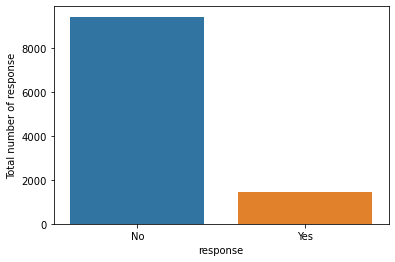

In [55]:
sns.countplot(x='response', data=data_new)
plt.ylabel('Total number of response')
plt.show()

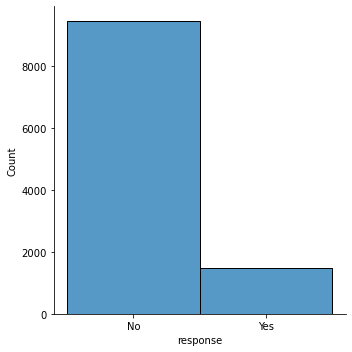

In [56]:
sns.displot(data_new['response'], bins=100) #Y-axis (Count) shows the total number of responses.
plt.show()

In [57]:
data_new['response'].value_counts()

No     9444
Yes    1466
Name: response, dtype: int64

## Show a plot of the response rate by the sales channel.

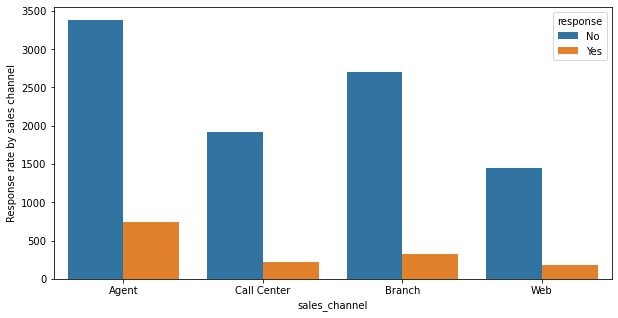

In [58]:
plt.figure(figsize = (10,5))
sns.countplot(x='sales_channel', hue='response', data=data_new)
plt.ylabel('Response rate by sales channel')
plt.show()

In [59]:
data_new['response_rate'] = np.where(data_new.response == 'Yes',1,0)

In [60]:
data_new.response_rate.value_counts()

0    9444
1    1466
Name: response_rate, dtype: int64

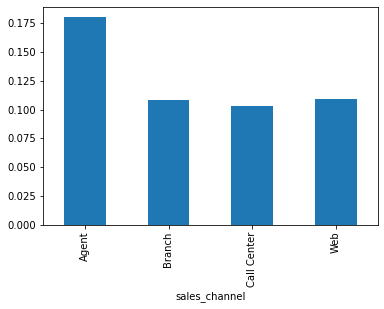

In [61]:
data_new.groupby('sales_channel')['response_rate'].mean().plot.bar()
plt.show()

<AxesSubplot:xlabel='sales_channel', ylabel='response_rate'>

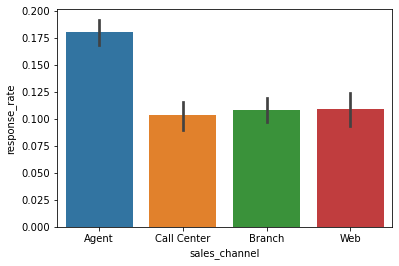

In [62]:
sns.barplot(x='sales_channel', y='response_rate', data=data_new)

## Show a plot of the response rate by the total claim amount.

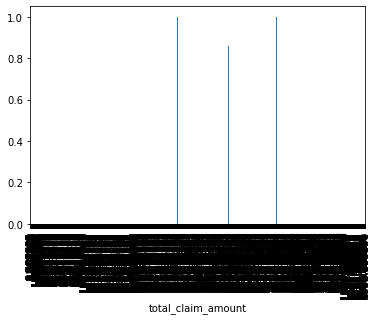

In [63]:
data_new.groupby('total_claim_amount')['response_rate'].mean().plot.bar()
plt.show()

In [64]:
print('Maximum value',data_new['total_claim_amount'].max())
print('Minimum value',data_new['total_claim_amount'].min())
print('Mean value',data_new['total_claim_amount'].mean())

Maximum value 2893.239678
Minimum value 0.099007
Mean value 434.88832970283863


In [65]:
def tca_bins(x):
    if x<=450:
        return 1
    elif x<=900:
        return 2
    elif x<=1350:
        return 3
    elif x<=1800:
        return 4
    else:
        return 5

data_new['total_claim_amount_bins'] = list(map(tca_bins,data_new['total_claim_amount']))

data_new

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,response_rate,total_claim_amount_bins
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011,2,0,1
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011,1,0,2
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011,2,0,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011,1,1,2
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,3.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,2011,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,3.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,2011,1,0,3
10906,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2011,1,0,1
10907,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011,2,0,1
10908,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2011,2,0,2


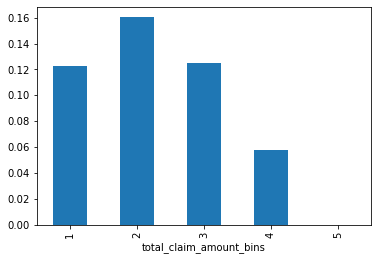

In [66]:
data_new.groupby('total_claim_amount_bins')['response_rate'].mean().plot.bar()
plt.show()

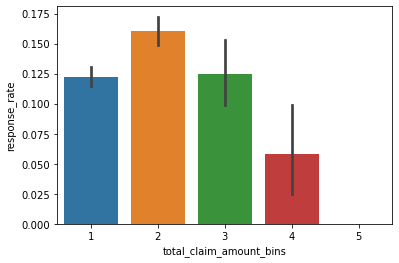

In [67]:
sns.barplot(x="total_claim_amount_bins", y="response_rate", data=data_new)
plt.show()

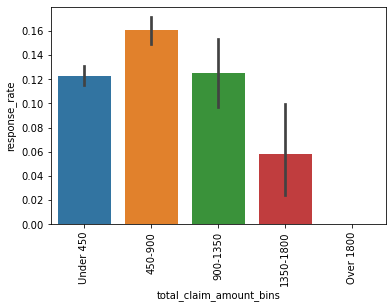

In [68]:
fig, ax = plt.subplots()
sns.barplot(x= 'total_claim_amount_bins',y='response_rate',data=data_new)

labels = ['Under 450','450-900','900-1350','1350-1800','Over 1800']

ax.set_xticklabels(x='total_claim_amount_bins',labels=labels,rotation='vertical')
plt.show()

## Show a plot of the response rate by income.

In [69]:
print('Maximum value',data_new['income'].max())
print('Minimum value',data_new['income'].min())
print('Mean value',data_new['income'].mean())

Maximum value 99981
Minimum value 0
Mean value 37536.28478460128


In [70]:
def income_bins(x):
    if x<20000:
        return 1
    elif x<40000:
        return 2
    elif x<60000:
        return 3
    elif x<80000:
        return 4
    else:
        return 5

data_new['income_bins'] = list(map(income_bins, data_new['income']))

data_new

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,response_rate,total_claim_amount_bins,income_bins
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011,2,0,1,3
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011,1,0,2,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011,2,0,2,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011,1,1,2,3
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,3.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,2011,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,3.0,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,2011,1,0,3,1
10906,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2011,1,0,1,4
10907,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011,2,0,1,2
10908,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2011,2,0,2,4


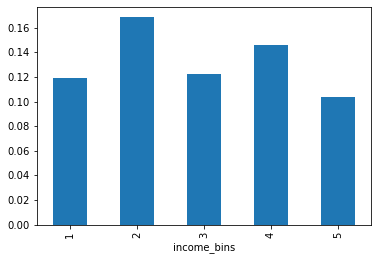

In [71]:
data_new.groupby('income_bins')['response_rate'].mean().plot.bar()
plt.show()

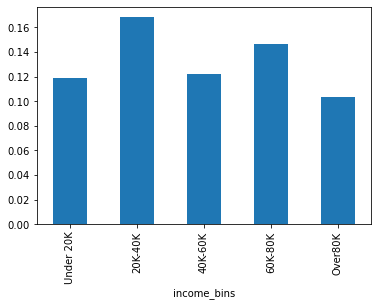

In [72]:
fig, ax = plt.subplots()
data_new.groupby('income_bins')['response_rate'].mean().plot.bar()

labels = ['Under 20K','20K-40K','40K-60K','60K-80K','Over80K']

ax.set_xticklabels(x='income_bins',labels=labels,rotation='vertical')
plt.show()

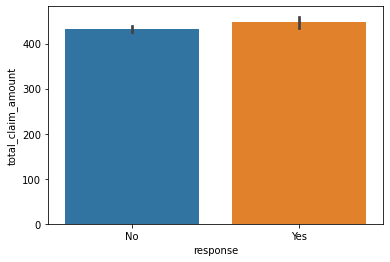

In [73]:
sns.barplot(x="response", y="total_claim_amount", data=data_new)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

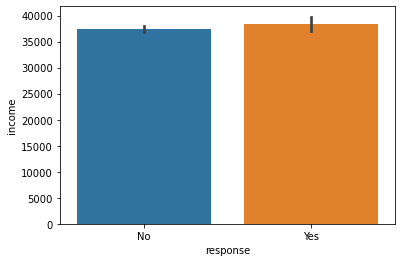

In [74]:
sns.barplot(x="response", y="income", data=data_new) #response by income
plt.show

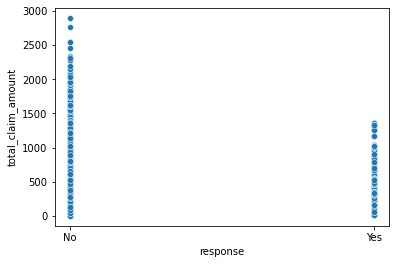

In [75]:
sns.scatterplot(x=data_new['response'], y=data_new['total_claim_amount']) #scatterplot for response by total claim amount
plt.show()

# END OF ROUND3 - START OF ROUND4

In [76]:
data_new.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,response_rate,total_claim_amount_bins,income_bins
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011,2,0,1,3
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011,1,0,2,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011,2,0,2,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011,1,1,2,3
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,3.0,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,2011,1,0,2,2


In [77]:
data_new['months_since_last_claim']=pd.to_numeric(data_new['months_since_last_claim'])
# This column is shown in numericals.

In [78]:
data_new['number_of_open_complaints']=pd.to_numeric(data_new['number_of_open_complaints'])
# This column is shown in numericals.

## Numerical and Categoricals

In [79]:
data_new.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [80]:
numerical=data_new.select_dtypes(include = np.number) #Get the numeric data into dataframe called numerical
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,year,month,response_rate,total_claim_amount_bins,income_bins
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2011,2,0,1,3
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,2011,1,0,2,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2011,2,0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,2011,1,1,2,3
4,9025.067525,23675,117,3.0,31,0.0,7,707.925645,2011,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,3.0,40,0.0,7,1214.400000,2011,1,0,3,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,2011,1,0,1,4
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2011,2,0,1,2
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2011,2,0,2,4


In [81]:
categoricals = marketing_customer_analysis.select_dtypes(include = object) #categorical columns in a dataframe called categoricals
categoricals

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


## Distribution plots for the numerical variables

In [82]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'year', 'month', 'response_rate', 'total_claim_amount_bins',
       'income_bins'],
      dtype='object')

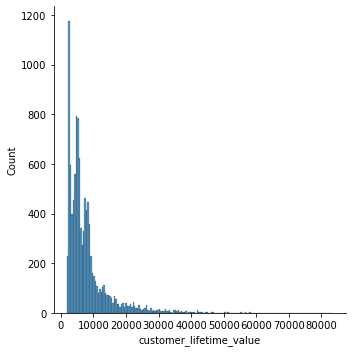

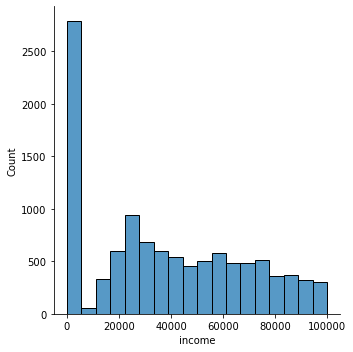

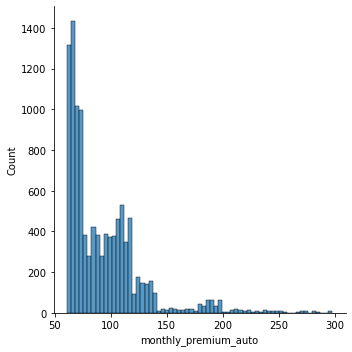

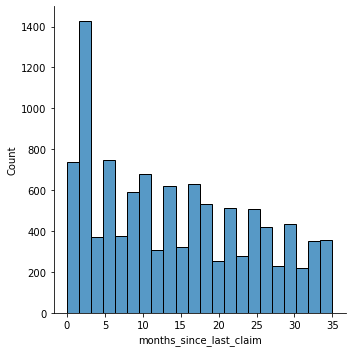

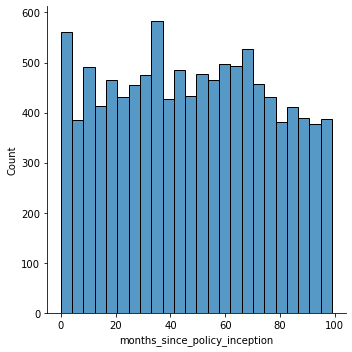

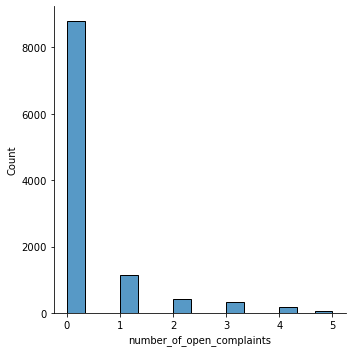

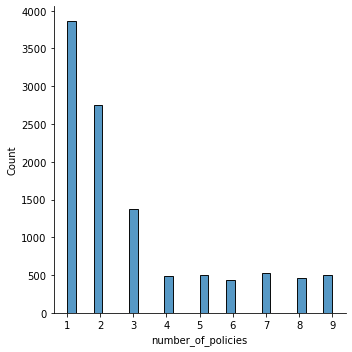

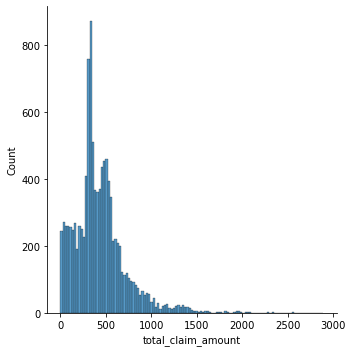

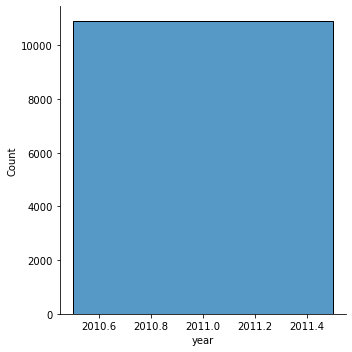

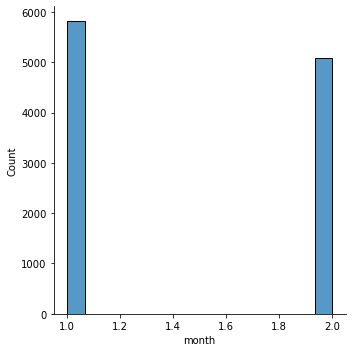

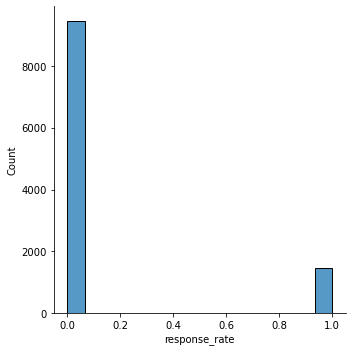

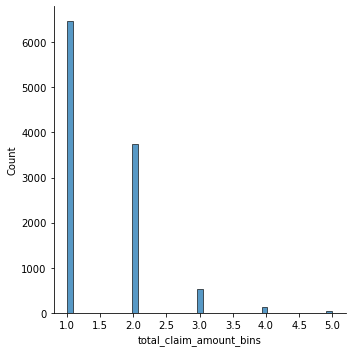

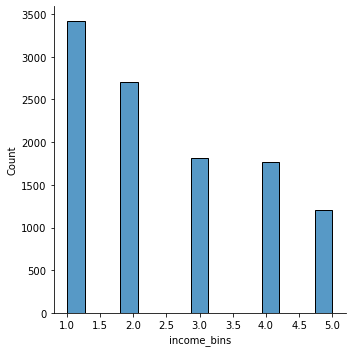

In [83]:
#construct distribution plots for the numerical variables
for i in numerical.columns:
    sns.displot(numerical[i])
    plt.show()

## Use Matplotlib to construct histograms

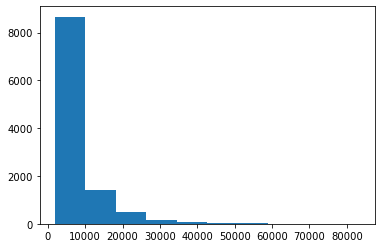

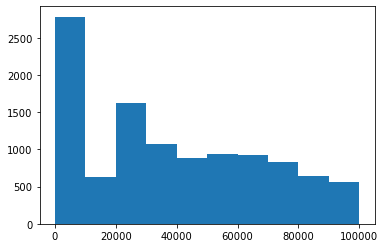

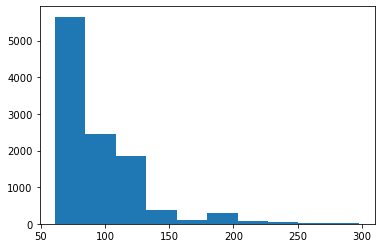

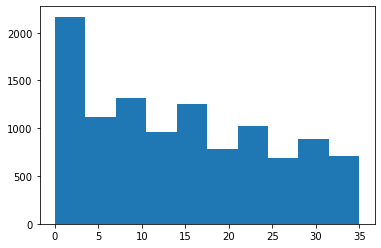

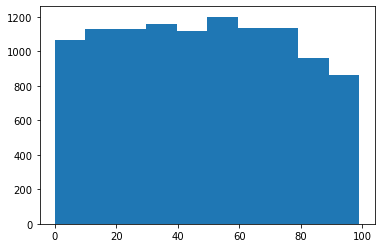

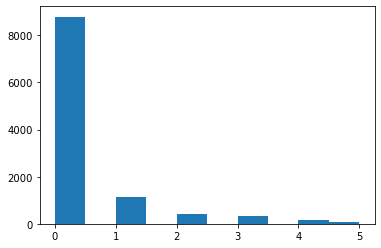

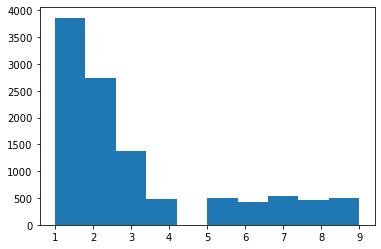

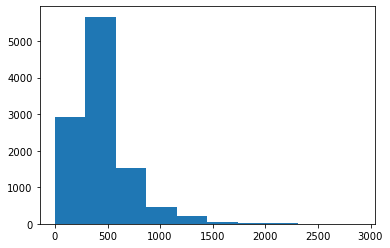

In [84]:
#construct histograms
fig, ax = plt.subplots()

for i in range(8):
    plt.hist(numerical.iloc[:,i])
    plt.show()  

Text(0, 0.5, 'count')

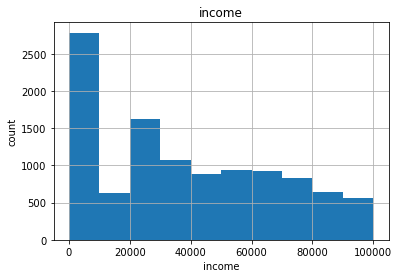

In [85]:
numerical.hist(column='income')
# plt.title('My title')
plt.xlabel('income')
plt.ylabel('count')

## Do the distributions for different numerical variables look like a normal distribution

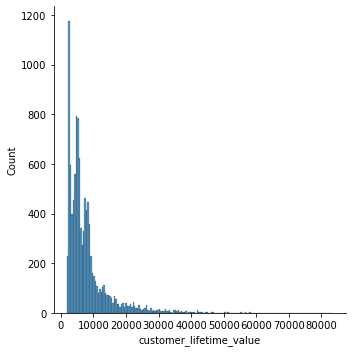

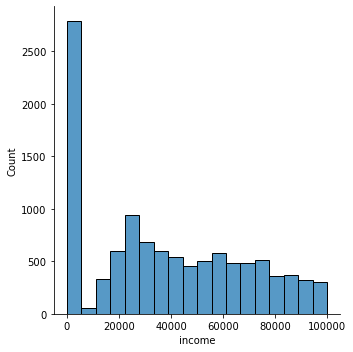

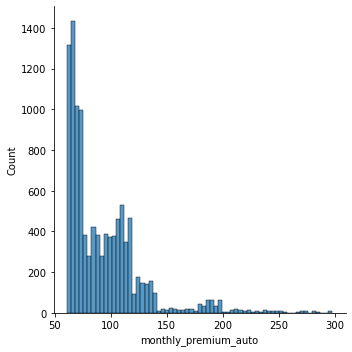

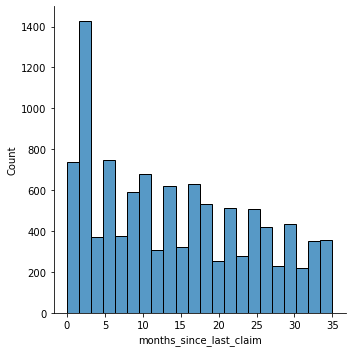

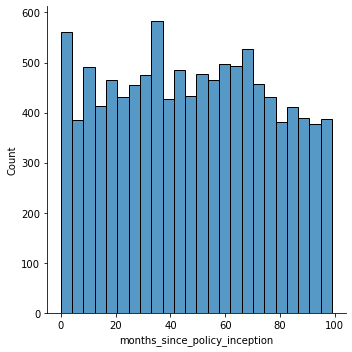

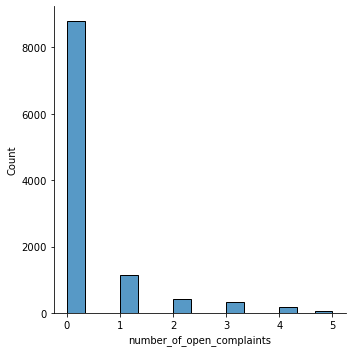

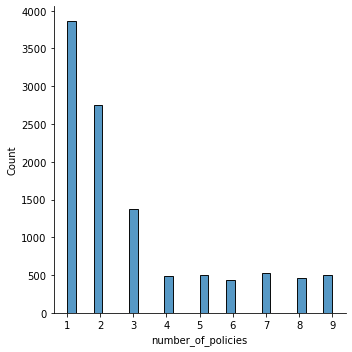

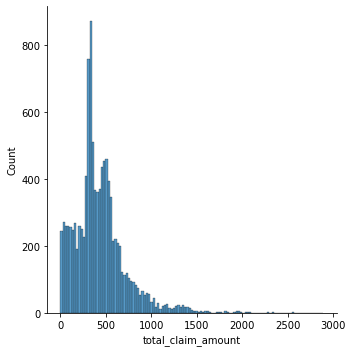

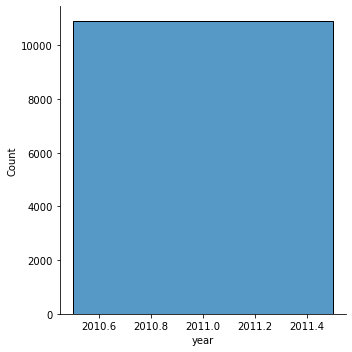

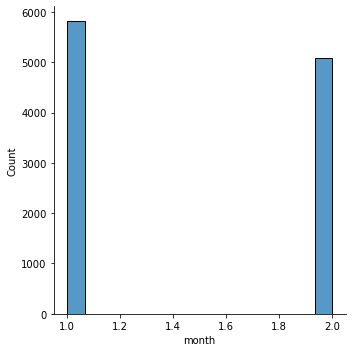

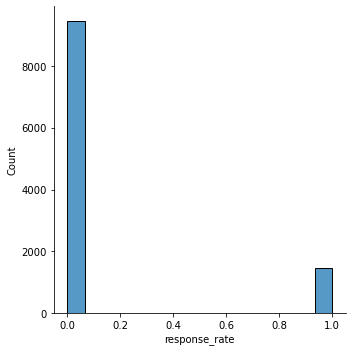

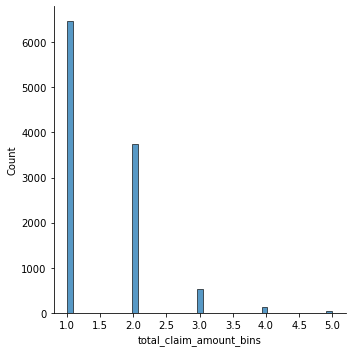

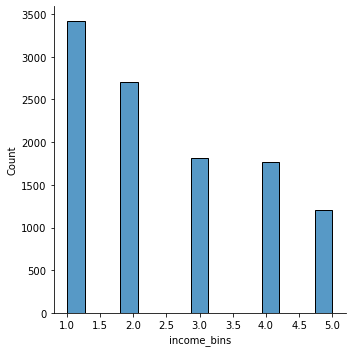

In [86]:
for i in numerical.columns:
    sns.displot(numerical[i])
    plt.show()

## For the numerical variables, check the multicollinearity between the features.

In [87]:
numerical = numerical.drop(['year'], axis=1) #year column does not make any sense in the heatmap below. That's why I removed it from the dataframe.
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate,total_claim_amount_bins,income_bins
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0,1,3
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0,2,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1,2,3
4,9025.067525,23675,117,3.0,31,0.0,7,707.925645,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,3.0,40,0.0,7,1214.400000,1,0,3,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0,1,4
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0,1,2
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2,0,2,4


In [88]:
correlations = numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate,total_claim_amount_bins,income_bins
customer_lifetime_value,1.000000,0.028306,0.403069,0.017062,0.016960,-0.030616,0.016024,0.232626,-0.009234,-0.007765,0.240704,0.029041
income,0.028306,1.000000,-0.009788,-0.018053,-0.005903,0.008425,-0.009960,-0.354141,-0.000443,0.011156,-0.311332,0.979103
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008043,0.018953,-0.010059,-0.020505,0.631799,0.007253,0.013918,0.642796,-0.010771
months_since_last_claim,0.017062,-0.018053,0.008043,1.000000,-0.036809,0.030285,0.000881,0.008327,-0.021782,-0.012378,0.012742,-0.022024
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.036809,1.000000,0.004165,-0.009123,0.003095,0.015163,-0.004875,-0.000100,-0.002014
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.030285,0.004165,1.000000,0.001681,-0.012380,-0.005802,-0.004419,-0.020825,0.010029
number_of_policies,0.016024,-0.009960,-0.020505,0.000881,-0.009123,0.001681,1.000000,-0.008923,0.005127,-0.018650,-0.012165,-0.011353
total_claim_amount,0.232626,-0.354141,0.631799,0.008327,0.003095,-0.012380,-0.008923,1.000000,0.001425,0.016416,0.900660,-0.341970
month,-0.009234,-0.000443,0.007253,-0.021782,0.015163,-0.005802,0.005127,0.001425,1.000000,-0.032981,0.002781,-0.005923
response_rate,-0.007765,0.011156,0.013918,-0.012378,-0.004875,-0.004419,-0.018650,0.016416,-0.032981,1.000000,0.013287,-0.007501


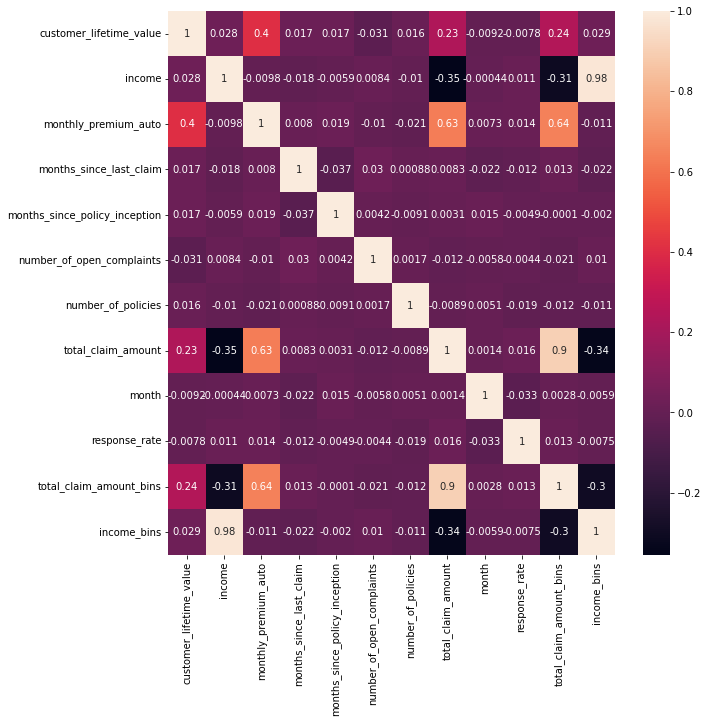

In [89]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot=True)
plt.show()

In [90]:
# I drop the columns making a high collinearity.

In [91]:
numerical.shape

(10910, 12)

In [92]:
numerical = numerical.drop(['total_claim_amount_bins','income_bins'], axis = 1)

In [93]:
numerical.shape

(10910, 10)

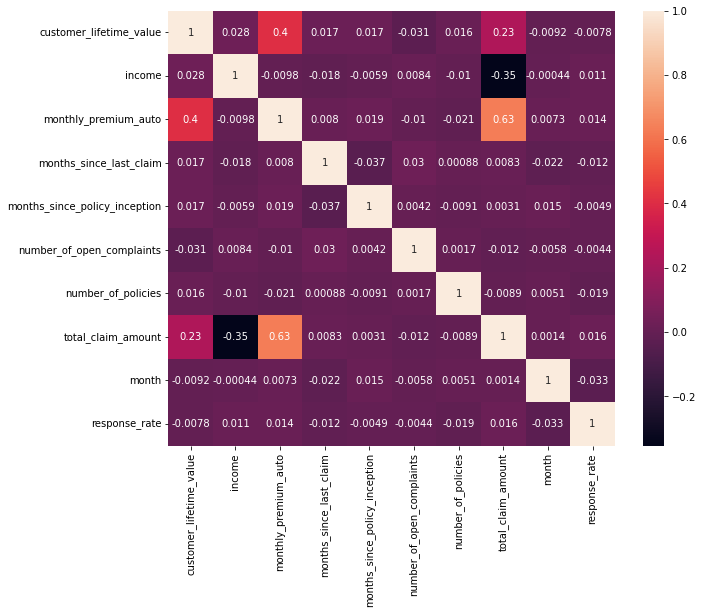

In [94]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

# END OF ROUND 4 - START OF ROUND 5

In [95]:
#Get the data. We are using the marketing_customer_analysis.csv file.

In [96]:
#Dealing with the data. Already done in Round 2.

In [97]:
#Explore the data. Done in Round 3.

In [98]:
#Processing data.
# X-y split.
# Normalize (numerical).

In [99]:
y = data_new['total_claim_amount']

In [100]:
y.shape

(10910,)

In [101]:
X = data_new.drop(['total_claim_amount'], axis=1)

In [102]:
X.shape

(10910, 27)

In [103]:
X = X.drop(columns=['effective_to_date','response_rate','month','year'], axis=1) #we do not need these columns.

## Numerical and Categorigal for X

In [104]:
X_numerical= X.select_dtypes(include = np.number)

In [105]:
X_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_bins,income_bins
0,4809.216960,48029,61,7.0,52,0.0,9,1,3
1,2228.525238,0,64,3.0,26,0.0,1,2,1
2,14947.917300,22139,100,34.0,31,0.0,2,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,2,3
4,9025.067525,23675,117,3.0,31,0.0,7,2,2
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,3.0,40,0.0,7,3,1
10906,5259.444853,61146,65,7.0,68,0.0,6,1,4
10907,23893.304100,39837,201,11.0,63,0.0,2,1,2
10908,11971.977650,64195,158,0.0,27,4.0,6,2,4


In [106]:
X_categoricals = X.select_dtypes(include = object)

In [107]:
X_categoricals

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


## Normalizing data using MinMaxScaler

In [108]:
#There are two ways to normalize numerical data: 1) minmax scaler 2) standart scaler

In [109]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_numerical)
X_normalized = transformer.transform(X_numerical)
print(X_normalized.shape)
X_normalized_scale = pd.DataFrame(X_normalized,columns=X_numerical.columns)
X_normalized_scale.head()

(10910, 9)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_bins,income_bins
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.00,0.50
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.25,0.00
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.25,0.25
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.25,0.50
4,0.087527,0.236795,0.236287,0.085714,0.313131,0.0,0.750,0.25,0.25


In [110]:
X_normalized_scale.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_bins,income_bins
customer_lifetime_value,1.000000,0.028306,0.403069,0.017062,0.016960,-0.030616,0.016024,0.240704,0.029041
income,0.028306,1.000000,-0.009788,-0.018053,-0.005903,0.008425,-0.009960,-0.311332,0.979103
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008043,0.018953,-0.010059,-0.020505,0.642796,-0.010771
months_since_last_claim,0.017062,-0.018053,0.008043,1.000000,-0.036809,0.030285,0.000881,0.012742,-0.022024
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.036809,1.000000,0.004165,-0.009123,-0.000100,-0.002014
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.030285,0.004165,1.000000,0.001681,-0.020825,0.010029
number_of_policies,0.016024,-0.009960,-0.020505,0.000881,-0.009123,0.001681,1.000000,-0.012165,-0.011353
total_claim_amount_bins,0.240704,-0.311332,0.642796,0.012742,-0.000100,-0.020825,-0.012165,1.000000,-0.299239
income_bins,0.029041,0.979103,-0.010771,-0.022024,-0.002014,0.010029,-0.011353,-0.299239,1.000000


# END OF ROUND5 - START OF ROUND6

In [111]:
#There are two ways to encode categorical columns: 1) One hot encoding 2)Label encoding

## One Hot/Label Encoding (categorical).

In [112]:
X_categoricals

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [113]:
X_categoricals.shape

(10910, 14)

In [114]:
X_categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize


In [115]:
X_categoricals['gender'].value_counts()

F    5573
M    5337
Name: gender, dtype: int64

In [116]:
# One hot encoding is a way to turn categorical variables into multiple numerical columns

In [117]:
encoder = OneHotEncoder(drop='first').fit(X_categoricals)

In [118]:
cols = encoder.get_feature_names(input_features=X_categoricals.columns)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [119]:
print(encoder.categories_)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

In [120]:
encoded = encoder.transform(X_categoricals).toarray()

In [121]:
print(encoded)

[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


In [122]:
onehot_encoded = pd.DataFrame(encoded,columns=cols)

## Concat DataFrames

In [123]:
X_normalized_scale

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_bins,income_bins
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.00,0.50
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.25,0.00
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.25,0.25
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.25,0.50
4,0.087527,0.236795,0.236287,0.085714,0.313131,0.0,0.750,0.25,0.25
...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.085714,0.404040,0.0,0.750,0.50,0.00
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.00,0.75
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.00,0.25
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,0.25,0.75


In [124]:
onehot_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10907,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10908,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [125]:
print(X_normalized_scale.shape,onehot_encoded.shape)

(10910, 9) (10910, 43)


In [126]:
# let's merge all this information together into a single dataset with all features, now numerical
X = pd.concat([X_normalized_scale, onehot_encoded], axis=1)  # np.concatenate()

In [127]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_bins,income_bins,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.25,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.25,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.25,0.50,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.087527,0.236795,0.236287,0.085714,0.313131,0.0,0.750,0.25,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.085714,0.404040,0.0,0.750,0.50,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.00,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.00,0.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,0.25,0.75,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Train-test split.

In [128]:
y = data_new['total_claim_amount']

In [129]:
# train test split is the way ML generates its claim to fame: 
# we build the model on a portion of the data but we then validate it in 
# another "fresh" portion
# our model has no opportunity to "cheat": it must accurately guess the values 
# in the "fresh" dataset that it never saw before

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 52)
(2182, 52)
(8728,)
(2182,)


In [131]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_bins,income_bins,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
3105,0.033983,0.000000,0.004219,0.742857,0.626263,0.0,0.250,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6032,0.103048,0.963553,0.278481,0.542857,0.121212,0.0,0.250,0.25,1.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
157,0.036541,0.188696,0.274262,0.114286,0.626263,0.0,0.000,0.25,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6964,0.061978,0.000000,0.029536,0.685714,0.313131,0.0,0.125,0.25,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6349,0.007055,0.638721,0.004219,0.742857,0.818182,0.0,0.000,0.00,0.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
y_train.head()

3105    297.600000
6032    609.600000
157     604.800000
6964    489.600000
6349    208.598246
Name: total_claim_amount, dtype: float64

## Linear Regression

In [133]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Model Validation

In [134]:
#R2
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9027570571641188

In [135]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.8932184983794074

In [136]:
y_test[:5]

4829    475.423848
5081    350.400000
5011    482.400000
4625    673.342650
3838    302.400000
Name: total_claim_amount, dtype: float64

In [137]:
predictions_test[:5]

array([567.79716615, 320.61249384, 624.46065493, 625.46324596,
       280.91815426])

In [138]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

8621.856105863208

In [139]:
#Root mean squared error
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

92.8539504052639

In [140]:
y_test.mean()

434.11199380064215

In [141]:
#Mean absolute error
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

70.85713663477374


In [142]:
print('\nLinear Regression Model Results_Marketing_Customer_Analysis\n')
print(' R2 SCORE: Train', round(r2_score(y_train, predictions),3), '| Test', round(r2_score(y_test, predictions_test),3))
print(' MSE SCORE: Train', round(mean_squared_error(y_test,predictions_test),3))
print(' RMSE SCORE: Train', round(np.sqrt(mean_squared_error(y_test,predictions_test)),3))
print(' MAE SCORE: Train', round(mean_absolute_error(y_test, predictions_test),3))


Linear Regression Model Results_Marketing_Customer_Analysis

 R2 SCORE: Train 0.903 | Test 0.893
 MSE SCORE: Train 8621.856
 RMSE SCORE: Train 92.854
 MAE SCORE: Train 70.857


# END OF ROUND6 - START OF ROUND7

In [143]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

import time
from datetime import date

#!pip3 install seaborn if you need to

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Modeling--- 
Description---
Try to improve the linear regression model.

In [144]:
#In Round2, I firstly tried to drop NaN values of each column separately. 
#And I replaced the NaN values with the most frequent value in each column.

#After completing Round 6, (In Round 2 again) I also tried to drop rows with NaN values by:
#marketing_customer_analysis=marketing_customer_analysis.dropna() #drop rows with NaN values.

# Each method ends up with the same R2, MSE, MAE, and RMSE. (Please see Round2 as well.)

In [145]:
# The R2, MSE, MAE, and RMSE values derived after removing vehicle_type and vehicle_size columns 
# are almost same as the previous ones. The NaN values are already cleaned from the DataFrame. 

In [146]:
# Therefore, the accuracy of my linear regression model remained same after applying the alternative methods in both Round2 and Round7.

In [147]:
marketing_customer_analysis2 = pd.read_csv('marketing_customer_analysis.csv')

In [148]:
marketing_customer_analysis_columns = marketing_customer_analysis2.columns
marketing_customer_analysis_columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [149]:
#Standardize header names.
cols1=[]
for c in range(len(marketing_customer_analysis2.columns)):
    cols1.append(marketing_customer_analysis2.columns[c].lower().replace(' ','_'))
marketing_customer_analysis2.columns = cols1

print(marketing_customer_analysis2.columns)

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')


In [150]:
round(marketing_customer_analysis2.isna().sum()/len(marketing_customer_analysis2),4)*100 #the percentage of NaN values in the columns.

unnamed:_0                        0.00
customer                          0.00
state                             5.78
customer_lifetime_value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective_to_date                 0.00
employmentstatus                  0.00
gender                            0.00
income                            0.00
location_code                     0.00
marital_status                    0.00
monthly_premium_auto              0.00
months_since_last_claim           5.80
months_since_policy_inception     0.00
number_of_open_complaints         5.80
number_of_policies                0.00
policy_type                       0.00
policy                            0.00
renew_offer_type                  0.00
sales_channel                     0.00
total_claim_amount                0.00
vehicle_class                     5.70
vehicle_size                      5.70
vehicle_type             

In [151]:
marketing_customer_analysis2.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [152]:
#Vehicle type was dropped since it has 50.25% NaN values.
columns_raw=list(marketing_customer_analysis2.columns)

marketing_customer_analysis2.dropna(axis=1, thresh= 0.9*len(marketing_customer_analysis2), inplace=True) 
#thresh = x * len(DataFrame) => x: ratio of clean data to all data in rows of the dataframe. 
#The remaining is NaN value. 

columns_result=list(marketing_customer_analysis2.columns)

columns_dropped=list(set(columns_raw) - set(columns_result))

print(columns_dropped)

['vehicle_type']


In [153]:
marketing_customer_analysis2 = marketing_customer_analysis2.drop(columns=['unnamed:_0','customer'], axis=1) #we do not need these columns.

In [154]:
marketing_customer_analysis2=marketing_customer_analysis2.dropna()

In [155]:
marketing_customer_analysis2.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [156]:
import time
from datetime import date

In [157]:
marketing_customer_analysis2['effective_to_date'] = pd.to_datetime(marketing_customer_analysis2['effective_to_date'])

In [158]:
marketing_customer_analysis2.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [159]:
marketing_customer_analysis2['year'] = marketing_customer_analysis2['effective_to_date'].dt.year

In [160]:
marketing_customer_analysis2['month'] = marketing_customer_analysis2['effective_to_date'].dt.month

In [161]:
data_new2 = marketing_customer_analysis2

In [162]:
data_new2['response_rate'] = np.where(data_new2.response == 'Yes',1,0)

In [163]:
data_new2.response_rate.value_counts()

0    7826
1    1308
Name: response_rate, dtype: int64

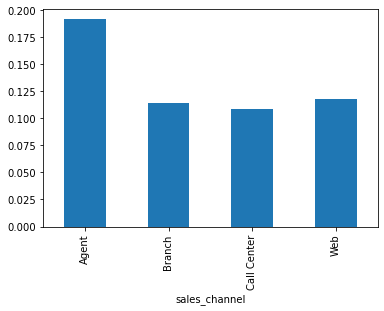

In [164]:
data_new2.groupby('sales_channel')['response_rate'].mean().plot.bar()
plt.show()

<AxesSubplot:xlabel='sales_channel', ylabel='response_rate'>

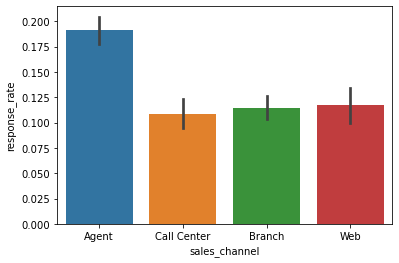

In [165]:
sns.barplot(x='sales_channel', y='response_rate', data=data_new2)

## Show a plot of the response rate by the total claim amount.

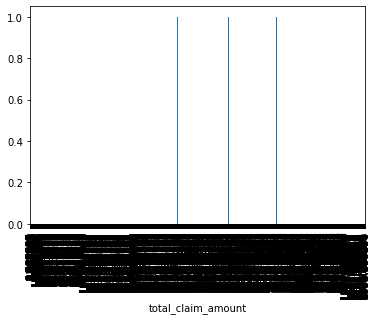

In [166]:
data_new2.groupby('total_claim_amount')['response_rate'].mean().plot.bar()
plt.show()

In [167]:
print('Maximum value',data_new2['total_claim_amount'].max())
print('Minimum value',data_new2['total_claim_amount'].min())
print('Mean value',data_new2['total_claim_amount'].mean())

Maximum value 2893.239678
Minimum value 0.099007
Mean value 434.08879431289563


In [168]:
def tca_bins(x):
    if x<=450:
        return 1
    elif x<=900:
        return 2
    elif x<=1350:
        return 3
    elif x<=1800:
        return 4
    else:
        return 5

data_new2['total_claim_amount_bins'] = list(map(tca_bins,data_new2['total_claim_amount']))

data_new2

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,response_rate,total_claim_amount_bins
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011,2,0,1
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011,1,0,2
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011,2,0,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011,1,1,2
6,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2011,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,2011,1,0,1
10904,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2011,2,0,2
10906,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2011,1,0,1
10907,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011,2,0,1


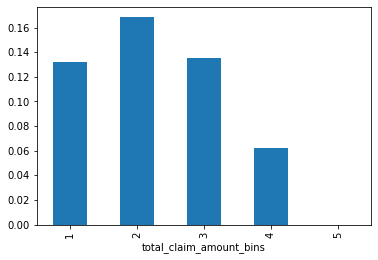

In [169]:
data_new2.groupby('total_claim_amount_bins')['response_rate'].mean().plot.bar()
plt.show()

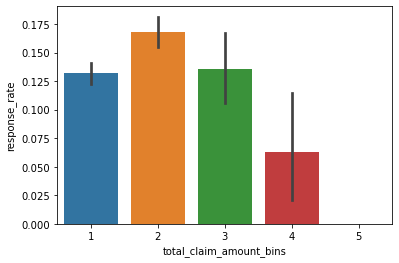

In [170]:
sns.barplot(x="total_claim_amount_bins", y="response_rate", data=data_new2)
plt.show()

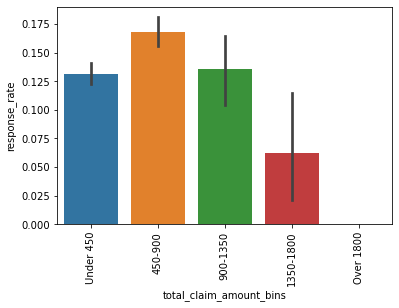

In [171]:
fig, ax = plt.subplots()
sns.barplot(x= 'total_claim_amount_bins',y='response_rate',data=data_new2)

labels = ['Under 450','450-900','900-1350','1350-1800','Over 1800']

ax.set_xticklabels(x='total_claim_amount_bins',labels=labels,rotation='vertical')
plt.show()

## Show a plot of the response rate by income.

In [172]:
print('Maximum value',data_new2['income'].max())
print('Minimum value',data_new2['income'].min())
print('Mean value',data_new2['income'].mean())

Maximum value 99981
Minimum value 0
Mean value 37657.38000875848


In [173]:
def income_bins(x):
    if x<20000:
        return 1
    elif x<40000:
        return 2
    elif x<60000:
        return 3
    elif x<80000:
        return 4
    else:
        return 5

data_new2['income_bins'] = list(map(income_bins, data_new2['income']))

data_new2

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,response_rate,total_claim_amount_bins,income_bins
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011,2,0,1,3
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011,1,0,2,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011,2,0,2,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011,1,1,2,3
6,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2011,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,2011,1,0,1,3
10904,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2011,2,0,2,1
10906,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2011,1,0,1,4
10907,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011,2,0,1,2


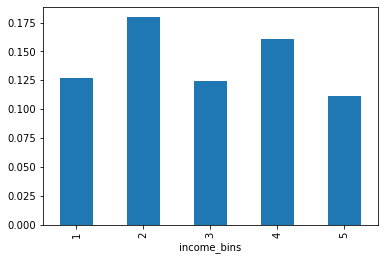

In [174]:
data_new2.groupby('income_bins')['response_rate'].mean().plot.bar()
plt.show()

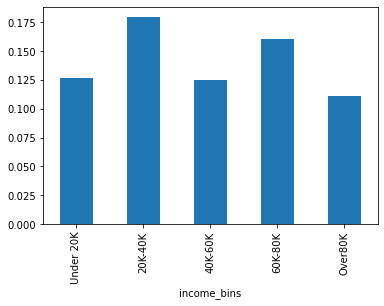

In [175]:
fig, ax = plt.subplots()
data_new2.groupby('income_bins')['response_rate'].mean().plot.bar()

labels = ['Under 20K','20K-40K','40K-60K','60K-80K','Over80K']

ax.set_xticklabels(x='income_bins',labels=labels,rotation='vertical')
plt.show()

In [176]:
data_new2.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,response_rate,total_claim_amount_bins,income_bins
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011,2,0,1,3
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011,1,0,2,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011,2,0,2,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011,1,1,2,3
6,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2011,2,0,1,2


In [177]:
data_new2['months_since_last_claim']=pd.to_numeric(data_new2['months_since_last_claim'])
# This column is shown in numericals.

In [178]:
data_new2['number_of_open_complaints']=pd.to_numeric(data_new2['number_of_open_complaints'])
# This column is shown in numericals.

## Numerical and Categoricals

In [179]:
data_new2.dtypes

state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                            object
total_claim_amount                      

In [180]:
numerical2=data_new2.select_dtypes(include = np.number) #Get the numeric data into dataframe called numerical
numerical2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,year,month,response_rate,total_claim_amount_bins,income_bins
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2011,2,0,1,3
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,2011,1,0,2,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2011,2,0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,2011,1,1,2,3
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2011,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,2011,1,0,1,3
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2011,2,0,2,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,2011,1,0,1,4
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2011,2,0,1,2


In [181]:
categoricals2 = data_new2.select_dtypes(include = object) #categorical columns in a dataframe called categoricals
categoricals2

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
10904,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


## Distribution plots for the numerical variables

In [182]:
numerical2.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'year', 'month', 'response_rate', 'total_claim_amount_bins',
       'income_bins'],
      dtype='object')

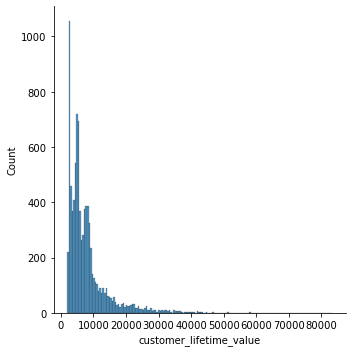

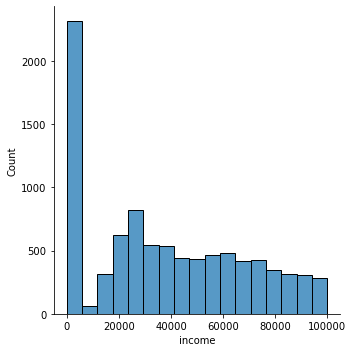

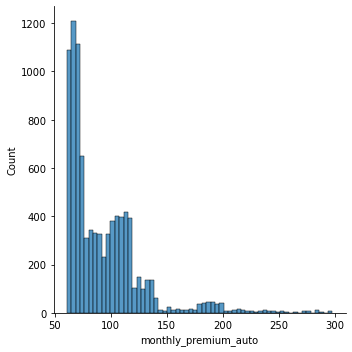

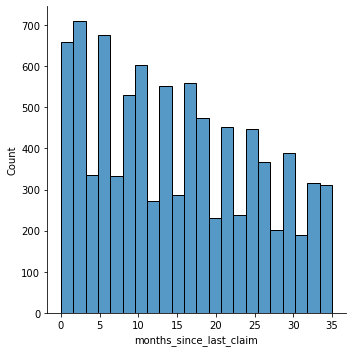

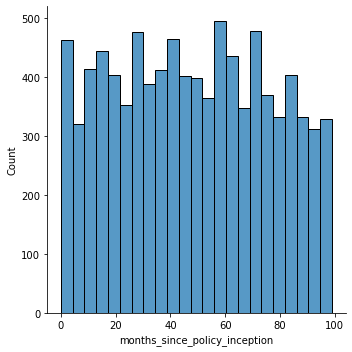

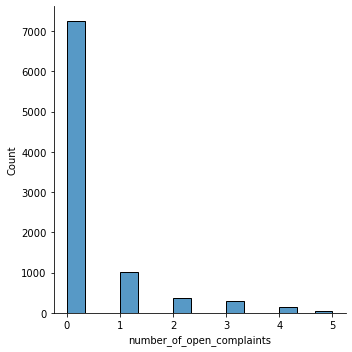

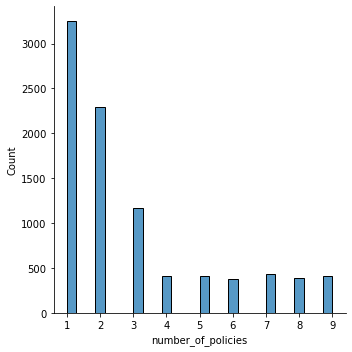

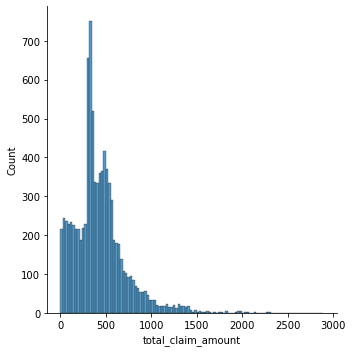

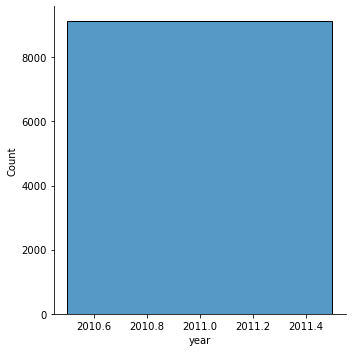

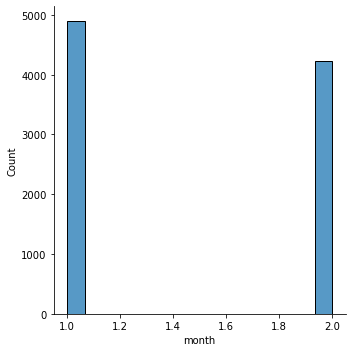

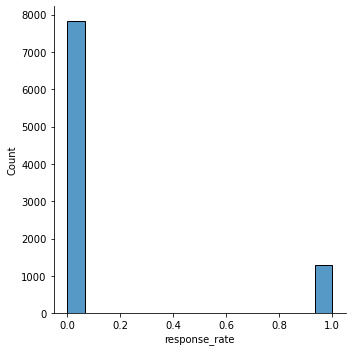

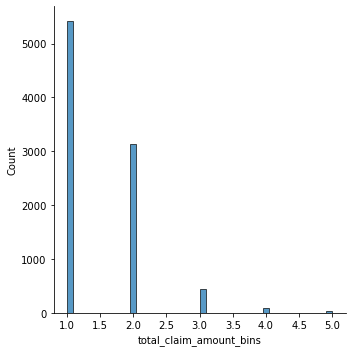

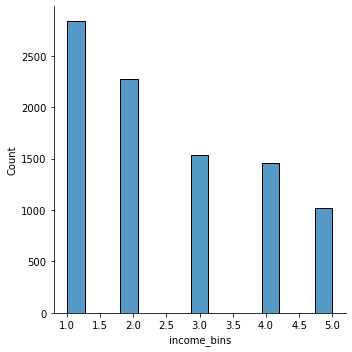

In [183]:
#construct distribution plots for the numerical variables
for i in numerical2.columns:
    sns.displot(numerical2[i])
    plt.show()

## Use Matplotlib to construct histograms

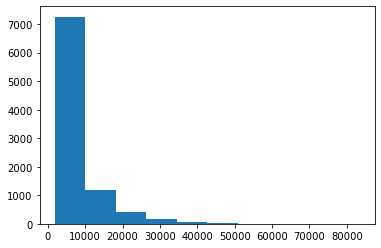

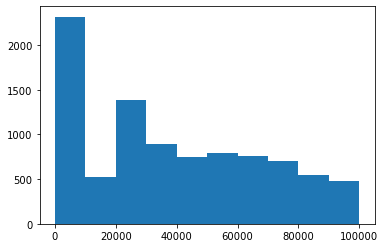

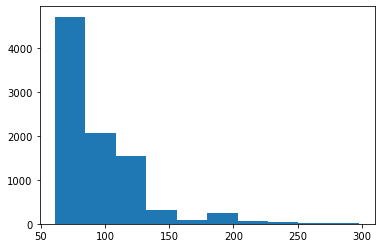

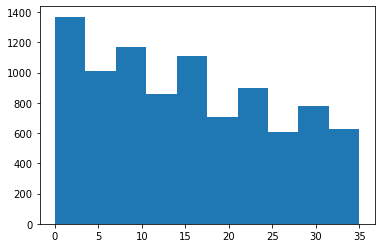

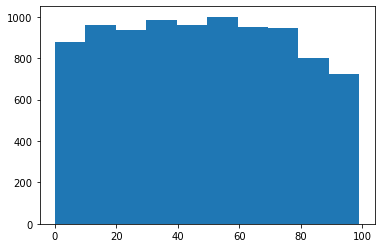

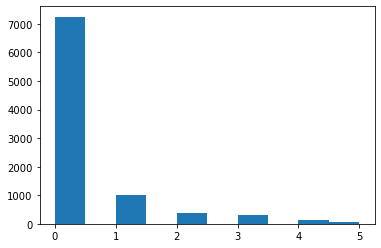

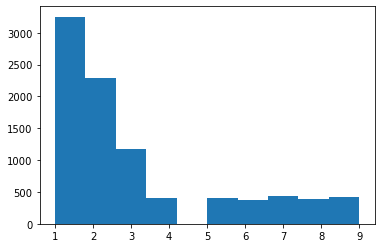

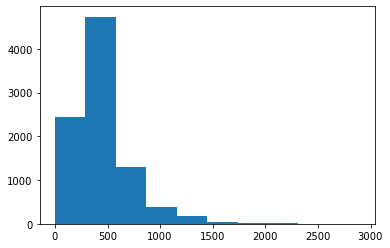

In [184]:
#construct histograms
fig, ax = plt.subplots()

for i in range(8):
    plt.hist(numerical2.iloc[:,i])
    plt.show()    
    

## Do the distributions for different numerical variables look like a normal distribution

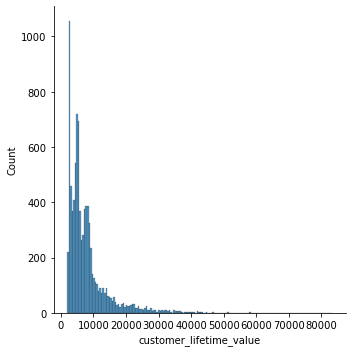

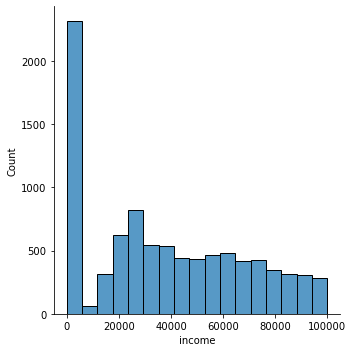

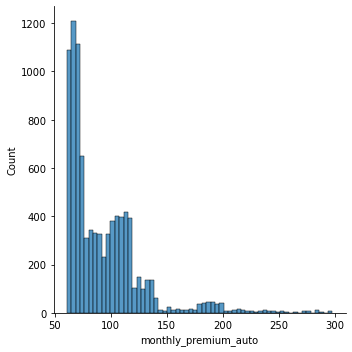

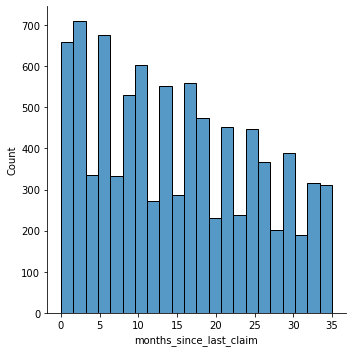

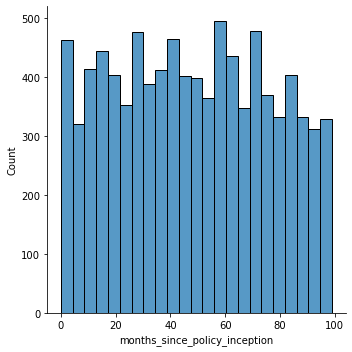

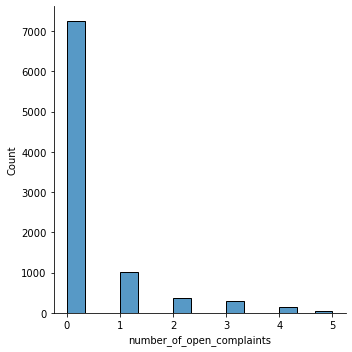

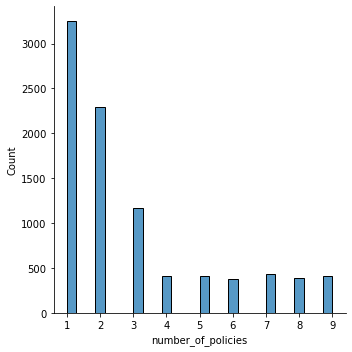

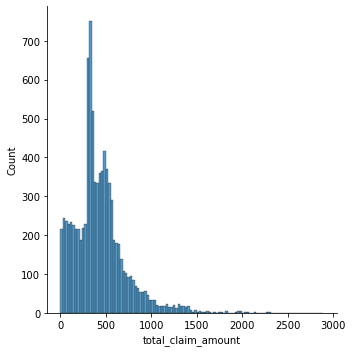

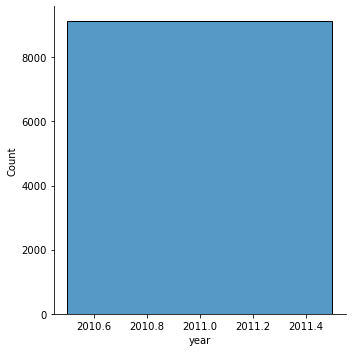

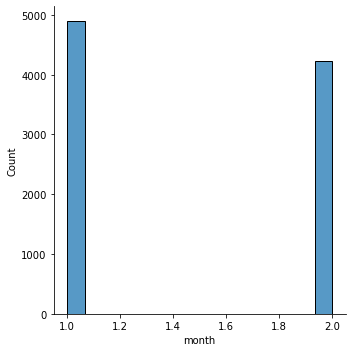

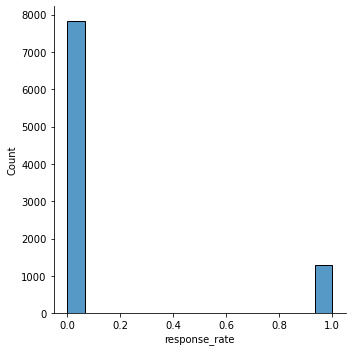

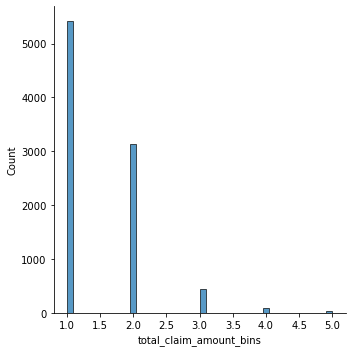

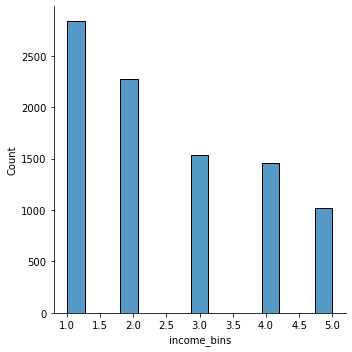

In [185]:
for i in numerical2.columns:
    sns.displot(numerical2[i])
    plt.show()

## For the numerical variables, check the multicollinearity between the features.

In [186]:
numerical2 = numerical2.drop(['year'], axis=1) #year column does not make any sense in the heatmap below. That's why I removed it from the dataframe.
numerical2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate,total_claim_amount_bins,income_bins
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0,1,3
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0,2,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1,2,3
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1,0,1,3
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2,0,2,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0,1,4
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0,1,2


In [187]:
correlations2 = numerical2.corr()
correlations2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,response_rate,total_claim_amount_bins,income_bins
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096,-0.008930,0.236394,0.024024
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169,0.011932,-0.313194,0.979159
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467,0.010966,0.642667,-0.018358
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921,-0.016597,0.014558,-0.032048
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010,0.002952,0.001155,0.003599
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335,-0.009881,-0.024583,0.008051
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305,-0.020891,-0.004080,-0.009076
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820,0.016877,0.898683,-0.343675
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000,-0.034221,0.008446,-0.005412
response_rate,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,-0.034221,1.000000,0.012828,-0.006683


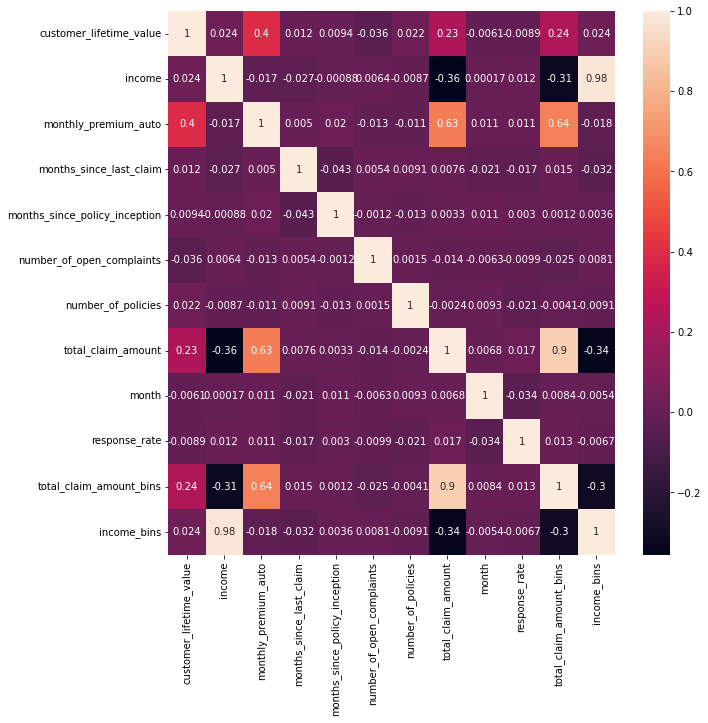

In [188]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations2, annot=True)
plt.show()

In [189]:
#I drop the columns making a high collinearity.

In [190]:
numerical2.shape

(9134, 12)

In [191]:
numerical2 = numerical2.drop(['total_claim_amount_bins','income_bins'], axis = 1)

In [192]:
numerical2.shape

(9134, 10)

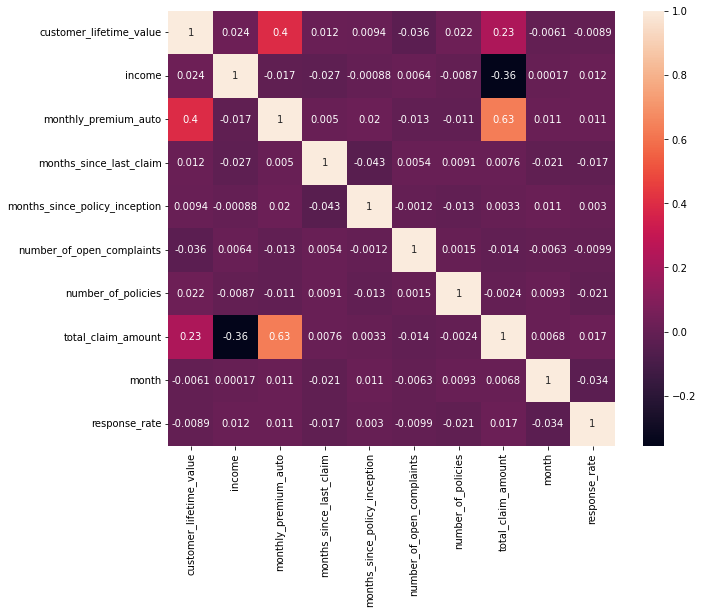

In [193]:
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(numerical2.corr(), annot=True)
plt.show()

In [194]:
#Now we do not have any features having multicollinearity.

In [195]:
#Get the data. We are using the marketing_customer_analysis.csv file.

In [196]:
#Dealing with the data. Already done in Round 2.

In [197]:
#Explore the data. Done in Round 3.

In [198]:
#Processing data.
# X-y split.
# Normalize (numerical).

In [199]:
data_new2

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,response_rate,total_claim_amount_bins,income_bins
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2011,2,0,1,3
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2011,1,0,2,1
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2011,2,0,2,2
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2011,1,1,2,3
6,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2011,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,2011,1,0,1,3
10904,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2011,2,0,2,1
10906,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2011,1,0,1,4
10907,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2011,2,0,1,2


In [200]:
data_new2.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,year,month,response_rate,total_claim_amount_bins,income_bins
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,NaN,-0.006096,-0.008930,0.236394,0.024024
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,NaN,0.000169,0.011932,-0.313194,0.979159
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,NaN,0.011467,0.010966,0.642667,-0.018358
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,NaN,-0.020921,-0.016597,0.014558,-0.032048
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,NaN,0.011010,0.002952,0.001155,0.003599
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,NaN,-0.006335,-0.009881,-0.024583,0.008051
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,NaN,0.009305,-0.020891,-0.004080,-0.009076
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,NaN,0.006820,0.016877,0.898683,-0.343675
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,NaN,1.000000,-0.034221,0.008446,-0.005412


In [201]:
data_new2.describe(include='all').T

/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_2863/3310757951.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_new2.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
state,9134,5,California,3150,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,9134.0,NaN,NaN,NaN,NaT,NaT,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
response,9134,2,No,7826,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,9134,3,Basic,5568,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9134,5,Bachelor,2748,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective_to_date,9134,59,2011-01-10 00:00:00,195,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,9134,5,Employed,5698,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,9134,2,F,4658,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,9134.0,NaN,NaN,NaN,NaT,NaT,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0
location_code,9134,3,Suburban,5779,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
y2 = data_new2['total_claim_amount']

In [203]:
y2.shape

(9134,)

In [204]:
X2 = data_new2.drop(['total_claim_amount'], axis=1)

In [205]:
X2.shape

(9134, 27)

In [206]:
X2 = X2.drop(columns=['effective_to_date','response_rate','month','year'], axis=1) #we do not need these columns.

## Numerical and Categorigal for X

In [207]:
X_numerical2= X2.select_dtypes(include = np.number)

In [208]:
X_categoricals2 = X2.select_dtypes(include = object)

In [209]:
X_numerical2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_bins,income_bins
0,4809.216960,48029,61,7.0,52,0.0,9,1,3
1,2228.525238,0,64,3.0,26,0.0,1,2,1
2,14947.917300,22139,100,34.0,31,0.0,2,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,2,3
6,5035.035257,37405,63,8.0,99,3.0,4,1,2
...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,1,3
10904,19228.463620,0,187,14.0,32,0.0,2,2,1
10906,5259.444853,61146,65,7.0,68,0.0,6,1,4
10907,23893.304100,39837,201,11.0,63,0.0,2,1,2


In [210]:
X_numerical2.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.00000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.00000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.00000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.00000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.00000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.00000
total_claim_amount_bins,9134.0,1.487957,0.676212,1.000000,1.000000,1.000000,2.000000,5.00000
income_bins,9134.0,2.513138,1.365044,1.000000,1.000000,2.000000,4.000000,5.00000


In [211]:
X_categoricals2

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
10904,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


## Normalizing data using previous transformer

In [212]:
X_normalized = transformer.transform(X_numerical2)
X_normalized_scale = pd.DataFrame(X_normalized,columns=X_numerical2.columns)
X_normalized_scale.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_bins,income_bins
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.00,0.50
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.25,0.00
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.25,0.25
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.25,0.50
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,0.00,0.25


## Encoding categoricals using previous encoder

In [213]:
#We do not need to fit again.
encoded = encoder.transform(X_categoricals2).toarray()
cols = encoder.get_feature_names(input_features=X_categoricals2.columns)
onehot_encoded = pd.DataFrame(encoded,columns=cols)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [214]:
#CONCAT X_normalized_scale.shape,onehot_encoded.shape IN validation_file

print(X_normalized_scale.shape,onehot_encoded.shape)

(9134, 9) (9134, 43)


In [215]:
# let's merge all this information together into a single dataset with all features, now numerical
X2 = pd.concat([X_normalized_scale, onehot_encoded], axis=1)  # np.concatenate()

In [216]:
X2.shape

(9134, 52)

In [217]:
#Predict using previous model
#We do not need to fit again.

## Results of Improved Model

In [218]:
predictions_valid = lm.predict(X2)

In [219]:
print('\n\nLinear Regression Model Results_To_IMPROVE\n')
print(' R2 SCORE: Train', round(r2_score(y2, predictions_valid),3))
print(' MSE SCORE: Train', round(mean_squared_error(y2,predictions_valid),3))
print(' RMSE SCORE: Train', round(np.sqrt(mean_squared_error(y2,predictions_valid)),3))
print(' MAE SCORE: Train', round(mean_absolute_error(y2, predictions_valid),3))



Linear Regression Model Results_To_IMPROVE

 R2 SCORE: Train 0.9
 MSE SCORE: Train 8457.45
 RMSE SCORE: Train 91.964
 MAE SCORE: Train 69.584


# BONUS (FROM ROUND2 TO ROUND7)

## The model has different results when it was ran within the function below.

In [220]:
marketing_customer_analysis = pd.read_csv('marketing_customer_analysis.csv')

In [221]:
def data_analytics(marketing_customer_analysis):
    
    import pandas as pd
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.model_selection import train_test_split
    import sklearn
    from sklearn import linear_model
    from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
    import time
    from datetime import date
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.max_rows', 500)
    
    #Dealing with data
    marketing_customer_analysis.columns = [c.lower().replace(' ','_') for c in marketing_customer_analysis.columns]
    marketing_customer_analysis = marketing_customer_analysis.drop(['unnamed:_0','customer'], axis=1)
    marketing_customer_analysis['vehicle_class'] = marketing_customer_analysis['vehicle_class'].fillna('Four-Door Car') # the most frequent value
    marketing_customer_analysis['vehicle_size'] = marketing_customer_analysis['vehicle_size'].fillna('Medsize') # the most frequent value
    marketing_customer_analysis.dropna(axis=1, thresh= 0.9*len(marketing_customer_analysis), inplace=True) #Vehicle type is dropped
    marketing_customer_analysis['number_of_open_complaints'] = marketing_customer_analysis['number_of_open_complaints'].fillna('0.0') # the most frequent value
    marketing_customer_analysis['months_since_last_claim'] = marketing_customer_analysis['months_since_last_claim'].fillna('3.0') # the most frequent value
    marketing_customer_analysis['response'] = marketing_customer_analysis['response'].fillna('No') # the most frequent value
    marketing_customer_analysis['state'] = marketing_customer_analysis['state'].fillna('California') # the most frequent value
    marketing_customer_analysis['effective_to_date'] = pd.to_datetime(marketing_customer_analysis['effective_to_date'],errors='coerce')
    marketing_customer_analysis['year'] = marketing_customer_analysis['effective_to_date'].dt.year
    marketing_customer_analysis['month'] = marketing_customer_analysis['effective_to_date'].dt.month
    marketing_customer_analysis = marketing_customer_analysis[(marketing_customer_analysis['month'] < 4)]
    
    #Explore the data (Done in the round 3.)

    #Processing Data
    
    #X-y split. (done)
    X = marketing_customer_analysis.drop(['total_claim_amount'], axis=1)
    y = marketing_customer_analysis['total_claim_amount']
    X = X.drop(columns=['effective_to_date','month','year'], axis=1) #we do not need these columns.
   
    X_numerical= X.select_dtypes(include = np.number)
    X_categoricals = X.select_dtypes(include = object)
    X_categoricals["months_since_last_claim"] = X_categoricals["months_since_last_claim"].astype(str)
    X_categoricals["number_of_open_complaints"]= X_categoricals["number_of_open_complaints"].astype(str)
    #Normalize (numerical). (done)
    
    #Minmax
    transformer = MinMaxScaler().fit(X_numerical)
    X_normalized = transformer.transform(X_numerical)
    X_normalized_scale = pd.DataFrame(X_normalized,columns=X_numerical.columns)
    X_normalized_scale.head()
    
    #One Hot/Label Encoding (categorical).
    encoder = OneHotEncoder(drop='first').fit(X_categoricals)
    cols = encoder.get_feature_names(input_features=X_categoricals.columns)
    encoded = encoder.transform(X_categoricals).toarray()
    onehot_encoded = pd.DataFrame(encoded,columns=cols)
    onehot_encoded.head(20)
    
    #Concat DataFrames
    X = pd.concat([X_normalized_scale, onehot_encoded], axis=1)
    
    #Linear Regression

    #Train-test split.
    y = marketing_customer_analysis['total_claim_amount']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Apply linear regression.
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    
    #Model Validation
    
    #Description:      
    print('\nLinear Regression Model Results_Marketing_Customer_Analysis\n')
    print(' R2 SCORE: Train', round(r2_score(y_train, predictions),3), '| Test', round(r2_score(y_test, predictions_test),3))
    print(' MSE SCORE: Train', round(mean_squared_error(y_test,predictions_test),3))
    print(' RMSE SCORE: Train', round(np.sqrt(mean_squared_error(y_test,predictions_test)),3))
    print(' MAE SCORE: Train', round(mean_absolute_error(y_test, predictions_test),3))
    

In [222]:
data_analytics(marketing_customer_analysis)


Linear Regression Model Results_Marketing_Customer_Analysis

 R2 SCORE: Train 0.903 | Test 0.893
 MSE SCORE: Train 8621.856
 RMSE SCORE: Train 92.854
 MAE SCORE: Train 70.857


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# END OF ROUND7 - START OF FINAL ROUND

In [223]:
# Reporting: Presenting Results

In [224]:
# Linear Regression Model Results_Marketing_Customer_Analysis

#  R2 SCORE: Train 0.903 | Test 0.893
#  MSE SCORE: Train 8621.856
#  RMSE SCORE: Train 92.854
#  MAE SCORE: Train 70.857

In [225]:
# Linear Regression Model Results_To_IMPROVE

#  R2 SCORE: Train 0.9
#  MSE SCORE: Train 8457.45
#  RMSE SCORE: Train 91.964
#  MAE SCORE: Train 69.584

In [226]:
#I did not choose MSE to interpret the accuracy of my model since it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.

# High R2 values (close to 1) and low difference between actual and predicted values could imply that my model is accurate.

In [227]:
# The actual and predicted data are so close to eachother when the model is built on original data and in improved case.
# This implies that the model is accurate.
# Please see 6.5 Model Validation and 7.11 Results of Improved Model

In [228]:
#R2 is about 0.90 when 1) the model is ran with original file and after the model is improved.

In [229]:
#Mean squared error: It is similar to the MAE metric, but it squares the absolute values of the errors. 
#Also, as with MAE, the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. 
#One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data

In [230]:
#Root mean squared error: Tries to solve the interpretation problem raised with the MSE by getting the square root of its final value, so as to scale it back to the same units of the data. 
#It is easier to interpret and good when we need to display or show the actual value of the data with the error. 
#It shows how much the data may vary, so, if we have an RMSE of 4.35, our model can make an error either because it added 4.35 to the actual value, or needed 4.35 to get to the actual value. The closer to 0, the better as well.

In [231]:
#Mean absolute error: When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. 
#This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.

# END OF FINAL ROUND